<a href="https://colab.research.google.com/github/elliotgunn/DS-Unit-2-Regression-Classification/blob/master/assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4

## Assignment

- [ ] Watch Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [x] Do train/validate/test split with the Tanzania Waterpumps data.
- [x] Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- [x] Use scikit-learn for logistic regression.
- [x] Get your validation accuracy score.
- [x] Get and plot your coefficients.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.


## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [x] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from the previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```

#### Pipelines

[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/compose.html) explains why pipelines are useful, and demonstrates how to use them:

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:
> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

### Reading
- [ ] [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
- [ ] [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)
- [ ] [Statistical Modeling: The Two Cultures](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).



In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd

train_features = pd.read_csv('../data/tanzania/train_features.csv')
train_labels = pd.read_csv('../data/tanzania/train_labels.csv')
test_features = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

## Do train/validate/test split with the Tanzania Waterpumps data.

In [0]:
train_labels

# labels has two columns: id, status_group

In [6]:
from sklearn.model_selection import train_test_split

X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split(
      X_train, y_train, train_size=0.80, test_size=0.20,
      stratify=y_train, random_state=42
)

# stratify: This stratify parameter makes a split so that the proportion of values 
# in the sample produced will be the same as the proportion of values provided 
# to parameter stratify


# validate the shapes
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

## Do one-hot encoding

In [11]:
# check cardinality first

X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
source_class,47520,3,groundwater,36638
management_group,47520,5,user-group,42027
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
waterpoint_type_group,47520,6,communal standpipe,27642
quality_group,47520,6,good,40598
payment_type,47520,7,never pay,20287


### Explore ```low-cardinality``` features

In [18]:
# source_type chosen over source has does not seem to drop information

X_train['source_type'].value_counts(dropna=False)

spring                  13620
shallow well            13507
borehole                 9511
river/lake               8271
rainwater harvesting     1859
dam                       518
other                     234
Name: source_type, dtype: int64

In [13]:
# unsure if should choose source_class over source_type

X_train['source_class'].value_counts(dropna=False)

groundwater    36638
surface        10648
unknown          234
Name: source_class, dtype: int64

In [14]:
X_train['management_group'].value_counts(dropna=False)

user-group    42027
commercial     2894
parastatal     1397
other           749
unknown         453
Name: management_group, dtype: int64

In [24]:
X_train['waterpoint_type_group'].value_counts(dropna=False)

communal standpipe    27642
hand pump             14015
other                  5138
improved spring         631
cattle trough            89
dam                       5
Name: waterpoint_type_group, dtype: int64

In [21]:
X_train['extraction_type_class'].value_counts(dropna=False)

gravity         21448
handpump        13184
other            5193
submersible      4894
motorpump        2355
rope pump         353
wind-powered       93
Name: extraction_type_class, dtype: int64

In [22]:
X_train['payment'].value_counts(dropna=False)

never pay                20287
pay per bucket            7161
pay monthly               6644
unknown                   6532
pay when scheme fails     3093
pay annually              2938
other                      865
Name: payment, dtype: int64

In [23]:
X_train['water_quality'].value_counts(dropna=False)

soft                  40598
salty                  3903
unknown                1503
milky                   658
coloured                403
salty abandoned         276
fluoride                165
fluoride abandoned       14
Name: water_quality, dtype: int64

### go with ```'extraction_type_class'```

In [27]:
# recombine X_train and y_train for exploratory data analysis

train = X_train.copy()
train['status_group'] = y_train

# groupby
train.groupby('extraction_type_class')['status_group'].value_counts(normalize=True)

extraction_type_class  status_group           
gravity                functional                 0.599403
                       non functional             0.299422
                       functional needs repair    0.101175
handpump               functional                 0.629854
                       non functional             0.310149
                       functional needs repair    0.059997
motorpump              non functional             0.574098
                       functional                 0.380892
                       functional needs repair    0.045011
other                  non functional             0.809936
                       functional                 0.159060
                       functional needs repair    0.031003
rope pump              functional                 0.657224
                       non functional             0.305949
                       functional needs repair    0.036827
submersible            functional                 0.541479
         

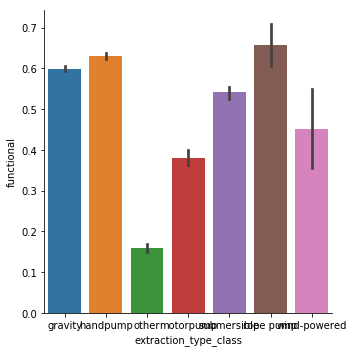

In [31]:
# visualize this with a chart

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# this adds a 'functional' col that marks 1 if 'functional'
train['functional'] = (train['status_group']=='functional').astype(int)

# plot
sns.catplot(x='extraction_type_class', y='functional', data=train, kind='bar');

### do one-hot encoding and scale features

In [0]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [67]:
# our cardinal feature one-hot encoded
categorical_features = ['water_quality', 'management_group']

# the col list of numeric features only, minus id as unnecessary
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()

# combine the features so we get a full list of what we want as features
features = categorical_features + numeric_features
features

['water_quality',
 'management_group',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [0]:
# now we have to filter the training & val data for the features only
# call it subset

X_train_subset = X_train[features]
X_val_subset = X_val[features]

In [0]:
# encoder time
encoder = ce.OneHotEncoder(use_cat_names=True)

# encoded subset
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.fit_transform(X_val_subset)

In [0]:
# feed this into scaler to standardize the data
scaler = StandardScaler()

# scaled subset
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.fit_transform(X_val_encoded)

In [71]:
# feed this last step's outputs into the model!

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000, n_jobs=-1)

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

print('Val accuracy', model.score(X_val_scaled, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Val accuracy 0.561952861952862


## get & plot coefficients

In [72]:
model.coef_[0]

array([ 0.11250659,  0.00757354,  0.06196202,  0.05556492, -0.31302068,
        0.02350388,  0.0129537 , -0.00573711, -0.04401014,  0.04773349,
        0.00162553,  0.02361867,  0.00069599,  0.57105998,  0.23113732,
        0.01265305, -0.01088093,  0.00372826, -0.21029883,  0.08221378,
        0.03539239, -0.08880781])

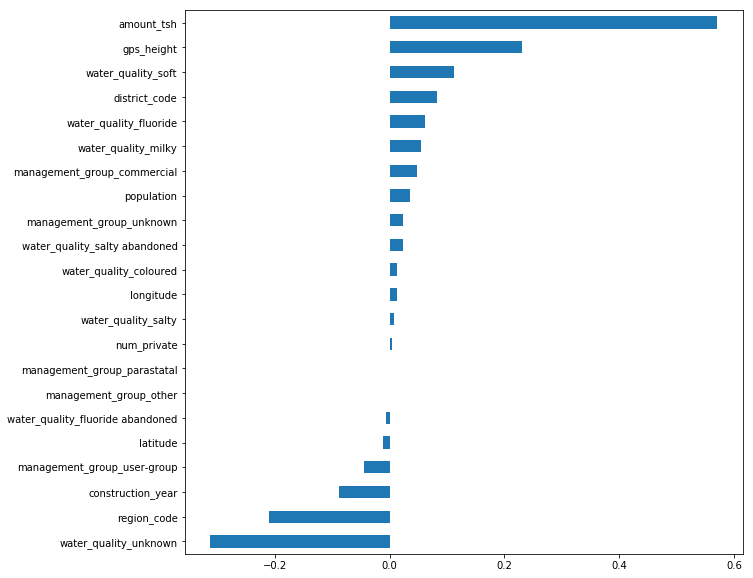

In [73]:
# plot the coefficients of each feature

functional_coefficients = pd.Series(
     model.coef_[0],
     X_train_encoded.columns
)

plt.figure(figsize=(10,10))
functional_coefficients.sort_values().plot.barh()